# 3.5 뉴스 기사 분류: 다중 분류 문제 예제

3.5.1 이 예제에서 사용되는 데이터가 무엇인가?
 - 로이터는 영국에서 정보를 제공하는 기업이며 제공받는 데이터는 46개의 각기 다른 장르의 짧은 뉴스와 토픽으로 이루어진 데이터셋입니다.
 - 데이터셋은 8982개의 훈련 샘플과 2246개의 테스트 샘플을 가지고 있습니다.
 - 레이블은 토픽의 인덱스로 0과 45 사이의 정수를 가지고 있습니다.

3.5.2 이 예제에서 예측하고자 하는 방법/방향이 무엇인가?
 - 입력되는 특정 토픽의 문서들이 어느 장르를 다루고 있는 문서인지를 분류하는 방법을 학습시키고자하는 예제입니다.

3.5.3 이 예제에서 학습을 위해 데이터가 어떻게 가공/처리 되었는가?
 - 3.4와 비슷한 형태로 데이터셋이 이루어져있기 때문에 3,4와 같이 원-핫 인코딩처리를 하여 데이터를 학습이 될 수 있도록 가공하였습니다.
 - 레이블 데이터는 이전 예제와 다르게 스칼라 데이터가 아니기 때문에 레이블을 벡터로 변경하기 위해서 원-핫 인코딩처리를 하였습니다.

3.5.4 사용된 모델의 입력층과 출력층이 무엇인가?
 - 입력층은 앞 예제와 비슷하게 벡터로 변환된 데이터(각 토픽에 존재하는 문자의 인덱스)가 입력되는 층입니다.
 - 출력층은 각 토픽에 대한 확률 분포를 반환하는 층입니다.

In [1]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#자주 등장하는 단어를 10000개로 두었으며 트레이닝 데이터는 8,982개 데이터를 가지고 있으며 테스트 데이터는  2,246개 데이터를 가지고 있음
#레이블은 토픽의 인덱스인 0 ~ 45의 정수를 가지고 있음
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)
# 원-핫 인코딩을 진행
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
#확률의 분포를 나타내기 위해서 softmax활성화 함수를 이용
model.add(layers.Dense(46, activation='softmax'))

In [5]:
#모델 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#훈련 데이터 중 1000개의 데이터를 샘플데이터로 이용
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
#훈련 시작
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 324us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 2s 233us/step - loss: 1.3912 - acc: 0.7040 - val_loss: 1.2783 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 2s 237us/step - loss: 1.0483 - acc: 0.7699 - val_loss: 1.1175 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 2s 227us/step - loss: 0.8241 - acc: 0.8281 - val_loss: 1.0219 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 2s 236us/step - loss: 0.6595 - acc: 0.8634 - val_loss: 0.9726 - val_acc: 0.7940
Epoch 6/20
7982/7982 [==============================] - 2s 233us/step - loss: 0.5248 - acc: 0.8938 - val_loss: 0.9206 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 2s 226us/step - loss: 0.4286 - acc: 0.9118 - val_loss: 0.9121 - val_acc: 0.8020


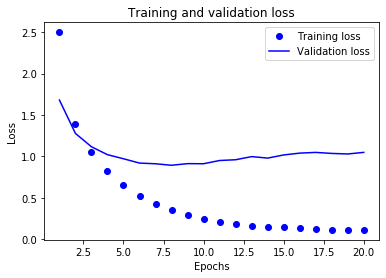

In [8]:
#손실 데이터 그래프로 확인
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
# 그래프를 초기화
plt.clf()   

<Figure size 432x288 with 0 Axes>

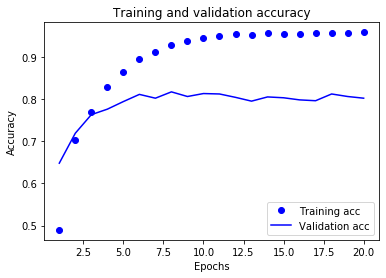

In [10]:
# 정확도를 그래프로 확인
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
# 그래프를 초기화
plt.clf()  

<Figure size 432x288 with 0 Axes>

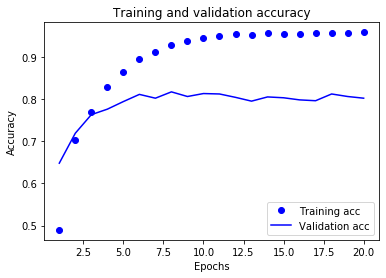

In [12]:
#정확도를 그래프로 표시
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
# 테스트 값을 이용하여 예측 후 데이터 결과 확인
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 1s 343us/step


[1.2097975579310185, 0.7791629564199507]

# 3.5 예제 종료